# **Delaney Solubility Prediction Using Machine Learning**

# **Load Data**

In [ ]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/dataprofessor/data/refs/heads/master/delaney_solubility_with_descriptors.csv')
df

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.59540,167.850,0.0,0.000000,-2.180
1,2.37650,133.405,0.0,0.000000,-2.000
2,2.59380,167.850,1.0,0.000000,-1.740
3,2.02890,133.405,1.0,0.000000,-1.480
4,2.91890,187.375,1.0,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790


# **Data Preparation**

## **Data Separation as X & Y**

In [ ]:
y = df['logS']
y


,logS
0,-2.180
1,-2.000
2,-1.740
3,-1.480
4,-3.040
...,...
1139,1.144
1140,-4.925
1141,-3.893
1142,-3.790


In [ ]:
x = df.drop('logS', axis= 1)
x

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.59540,167.850,0.0,0.000000
1,2.37650,133.405,0.0,0.000000
2,2.59380,167.850,1.0,0.000000
3,2.02890,133.405,1.0,0.000000
4,2.91890,187.375,1.0,0.000000
...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000
1140,3.42130,286.114,2.0,0.333333
1141,3.60960,308.333,4.0,0.695652
1142,2.56214,354.815,3.0,0.521739


## **Data Splitting**

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=100)

In [ ]:
y_train

,logS
107,-4.440
378,-1.250
529,-1.655
546,-1.886
320,-0.740
...,...
802,-2.925
53,-2.680
350,-7.020
79,-4.800


# **Model Building**

## **Linear Regression**

### **Training the model**

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)


LinearRegression()

### **Applying the model to make prediction**

In [ ]:
y_lr_train_pred = lr.predict(x_train)
y_lr_test_pred = lr.predict(x_test)
print (y_lr_train_pred)

[-2.83668969  0.84208401 -0.50930302 -0.13058053 -1.6269208  -2.86103037
 -2.32208333 -4.16684323 -5.04235077 -2.29737009 -3.15082845 -4.33037208
 -1.43700682 -2.59060064 -7.09025955 -2.32734557 -4.19073421 -2.63904005
 -3.58104074 -3.75929058 -2.5501665  -3.26968347 -2.78911367 -2.69251051
 -0.77437547 -6.61955792 -2.99084623 -2.36975061 -7.18167736 -1.52816491
 -4.81736265 -0.86996608 -7.09025955 -1.87404275 -2.58013247 -4.80953284
 -4.17454084 -1.95444152 -3.50503339 -2.7411418  -1.87131835 -2.45270806
 -3.07252433 -1.48988982 -3.98778754 -1.35216679 -0.16932277 -6.05237002
 -3.29550658  0.30513174 -3.25501463 -5.31993586 -0.4733928  -4.79180882
 -5.82486323 -2.70343539 -3.70838271 -2.4987341  -2.12301018 -3.11393974
 -2.79842053 -1.38274662 -4.3267103  -3.57778946 -3.42356884 -9.15826626
 -6.52588866 -1.75832085 -4.97842312 -1.59255758 -1.91317252 -2.81075595
 -1.14056747 -1.6326702  -1.6269208  -5.33227425 -3.88805074  0.70432882
 -3.99288096 -2.22595859 -2.63405871 -1.80643013 -4

In [ ]:
print(y_lr_test_pred)

[-3.05722870e+00 -7.77785827e+00 -2.55016650e+00 -2.01523582e+00
 -2.06375990e+00 -9.99672215e-01 -5.94603364e-01 -5.53626003e-01
 -5.72200956e+00 -3.94006681e+00 -3.95496755e+00 -2.29737009e+00
 -1.48980354e+00 -1.48988982e+00 -4.64510806e+00 -1.90396018e+00
 -1.51566313e+00 -3.16424605e+00 -3.70863920e+00 -5.58105660e+00
 -3.25038467e+00 -5.04235077e+00 -5.69194881e+00 -2.14339849e+00
 -4.35689341e+00 -5.03964756e+00 -3.10383618e+00 -4.40286964e+00
 -4.21276272e+00  5.56508349e-01 -1.45537678e+00 -4.41027396e+00
 -2.59668773e+00 -1.53336276e+00 -5.55749874e-01 -1.67111795e+00
 -2.78163675e+00 -3.15395565e+00 -5.27083361e+00 -1.75321446e+00
 -1.53350725e+00 -2.01255666e+00 -6.57559167e+00 -7.89433046e+00
 -5.76437127e+00 -4.16422068e+00 -3.43694663e+00  1.43834212e+00
 -1.12679105e-02 -2.34521849e+00 -1.86480046e+00 -5.03964756e+00
  8.55886378e-01 -3.17679292e+00 -5.06764094e+00 -1.99464442e+00
 -7.77785827e+00 -1.21764693e+00 -9.09541075e-01 -5.04235077e+00
 -2.43898748e+00 -2.84034

### **Evaluate Model Performance**

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [ ]:
print('LR_TRAIN_MSE: ', lr_train_mse)
print('LR_TRAIN_R2: ', lr_train_r2)
print('LR_TEST_MSE: ', lr_test_mse)
print('LR_TEST_R2: ', lr_test_r2)

LR_TRAIN_MSE:  1.0075362951093687
LR_TRAIN_R2:  0.7645051774663391
LR_TEST_MSE:  1.0206953660861033
LR_TEST_R2:  0.7891616188563282


In [ ]:
lr_results = pd.DataFrame(['Linear regression', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]). transpose()
lr_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']

lr_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,1.007536,0.764505,1.020695,0.789162


## **Random Forest**

### **Training the model**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth= 2, random_state= 100)
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=2, random_state=100)

### **Applying the model to make predictions**

In [ ]:
y_rf_train_pred = rf.predict(x_train)
y_rf_test_pred = rf.predict(x_test)
print (y_rf_train_pred)

[-4.44388581 -1.40132433 -1.41481453 -1.41481453 -1.44411435 -2.67492782
 -2.50755276 -3.95611327 -4.62529592 -2.27343298 -2.69241199 -4.5150244
 -1.41481453 -2.67492782 -7.14501987 -2.30422396 -4.0676017  -3.36086239
 -2.53282364 -4.5150244  -2.47178242 -4.0676017  -2.66143763 -1.42912192
 -1.2164651  -7.14501987 -2.67492782 -2.47178242 -7.14501987 -1.2164651
 -4.5150244  -1.2164651  -7.14501987 -1.41481453 -1.64246378 -4.5150244
 -4.5150244  -1.41481453 -2.71012897 -1.64246378 -2.42959807 -2.89446137
 -2.47178242 -1.24495146 -2.69241199 -1.2164651  -1.2164651  -4.65157679
 -2.6279475  -1.2164651  -1.79134844 -4.5150244  -1.2164651  -4.44388581
 -4.62529592 -4.0676017  -4.5150244  -2.66143763 -1.41481453 -4.0676017
 -2.67492782 -1.40132433 -3.32568382 -2.51725697 -4.44388581 -7.14501987
 -7.14501987 -1.44411435 -4.5150244  -1.42961706 -1.74496555 -2.67492782
 -1.2164651  -1.5451346  -1.44411435 -4.65157679 -4.0676017  -1.2164651
 -4.5150244  -2.39838248 -2.66143763 -1.40132433 -4.5150

In [ ]:
print(y_lr_test_pred)

[-3.05722870e+00 -7.77785827e+00 -2.55016650e+00 -2.01523582e+00
 -2.06375990e+00 -9.99672215e-01 -5.94603364e-01 -5.53626003e-01
 -5.72200956e+00 -3.94006681e+00 -3.95496755e+00 -2.29737009e+00
 -1.48980354e+00 -1.48988982e+00 -4.64510806e+00 -1.90396018e+00
 -1.51566313e+00 -3.16424605e+00 -3.70863920e+00 -5.58105660e+00
 -3.25038467e+00 -5.04235077e+00 -5.69194881e+00 -2.14339849e+00
 -4.35689341e+00 -5.03964756e+00 -3.10383618e+00 -4.40286964e+00
 -4.21276272e+00  5.56508349e-01 -1.45537678e+00 -4.41027396e+00
 -2.59668773e+00 -1.53336276e+00 -5.55749874e-01 -1.67111795e+00
 -2.78163675e+00 -3.15395565e+00 -5.27083361e+00 -1.75321446e+00
 -1.53350725e+00 -2.01255666e+00 -6.57559167e+00 -7.89433046e+00
 -5.76437127e+00 -4.16422068e+00 -3.43694663e+00  1.43834212e+00
 -1.12679105e-02 -2.34521849e+00 -1.86480046e+00 -5.03964756e+00
  8.55886378e-01 -3.17679292e+00 -5.06764094e+00 -1.99464442e+00
 -7.77785827e+00 -1.21764693e+00 -9.09541075e-01 -5.04235077e+00
 -2.43898748e+00 -2.84034

### **Evaluating the model performance**

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

In [ ]:
print('RF_TRAIN_MSE: ', rf_train_mse)
print('RF_TRAIN_R2: ', rf_train_r2)
print('RF_TEST_MSE: ', rf_test_mse)
print('RF_TEST_R2: ', rf_test_r2)

RF_TRAIN_MSE:  1.028227802112806
RF_TRAIN_R2:  0.7596688824431413
RF_TEST_MSE:  1.407688264904896
RF_TEST_R2:  0.7092230211002489


In [ ]:
rf_results = pd.DataFrame(['Random Forest', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]). transpose()
rf_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']

rf_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Random Forest,1.028228,0.759669,1.407688,0.709223


## **K-Nearest Neighbour Method**

### **Training the model**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

knn = KNeighborsRegressor(
    n_neighbors=5,
    weights='distance'
)

knn.fit(x_train, y_train)


KNeighborsRegressor(weights='distance')

### **Applying the model to make predictions**

In [ ]:

y_knn_train_pred = knn.predict(x_train)
y_knn_test_pred = knn.predict(x_test)


### **Evaluating the model performance**

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

knn_train_mse = mean_squared_error(y_train, y_knn_train_pred)
knn_train_r2 = r2_score(y_train, y_knn_train_pred)

knn_test_mse = mean_squared_error(y_test, y_knn_test_pred)
knn_test_r2 = r2_score(y_test, y_knn_test_pred)

In [ ]:
print('KNN_TRAIN_MSE:', knn_train_mse)
print('KNN_TRAIN_R2:', knn_train_r2)
print('KNN_TEST_MSE:', knn_test_mse)
print('KNN_TEST_R2:', knn_test_r2)

KNN_TRAIN_MSE: 0.013830555373406193
KNN_TRAIN_R2: 0.9967673381107837
KNN_TEST_MSE: 1.248744950970235
KNN_TEST_R2: 0.7420549042625042


In [ ]:
knn_results = pd.DataFrame(['KNN', knn_train_mse, knn_train_r2, knn_test_mse, knn_test_r2]).transpose()
knn_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
knn_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,KNN,0.013831,0.996767,1.248745,0.742055


## **Gradient Boosting Method**

### **Training the model**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=3,
    random_state=100
)

gbr.fit(x_train, y_train)

GradientBoostingRegressor(learning_rate=0.05, n_estimators=200,
                          random_state=100)

### **Applying the model to make predictions**

In [ ]:
y_gbr_train_pred = gbr.predict(x_train)
y_gbr_test_pred = gbr.predict(x_test)

### **Evaluating the model performance**

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

gbr_train_mse = mean_squared_error(y_train, y_gbr_train_pred)
gbr_train_r2 = r2_score(y_train, y_gbr_train_pred)

gbr_test_mse = mean_squared_error(y_test, y_gbr_test_pred)
gbr_test_r2 = r2_score(y_test, y_gbr_test_pred)

In [ ]:
print('GBR_TRAIN_MSE:', gbr_train_mse)
print('GBR_TRAIN_R2:', gbr_train_r2)
print('GBR_TEST_MSE:', gbr_test_mse)
print('GBR_TEST_R2:', gbr_test_r2)

GBR_TRAIN_MSE: 0.3427550641287245
GBR_TRAIN_R2: 0.9198867143632323
GBR_TEST_MSE: 0.6789566713085011
GBR_TEST_R2: 0.8597523509935239


In [ ]:
gbr_results = pd.DataFrame(['Gradient Boosting', gbr_train_mse, gbr_train_r2, gbr_test_mse, gbr_test_r2]).transpose()
gbr_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']

gbr_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Gradient Boosting,0.342755,0.919887,0.678957,0.859752


## **Model Comparison**

In [ ]:
df_models = pd.concat([lr_results, rf_results, knn_results, gbr_results], axis=0)
df_models

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,1.007536,0.764505,1.020695,0.789162
0,Random Forest,1.028228,0.759669,1.407688,0.709223
0,KNN,0.013831,0.996767,1.248745,0.742055
0,Gradient Boosting,0.342755,0.919887,0.678957,0.859752


In [ ]:
df_models.reset_index(drop = True)

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,1.007536,0.764505,1.020695,0.789162
1,Random Forest,1.028228,0.759669,1.407688,0.709223
2,KNN,0.013831,0.996767,1.248745,0.742055
3,Gradient Boosting,0.342755,0.919887,0.678957,0.859752


# **Data Visualization of predicted result**

## **Visualizing all models**

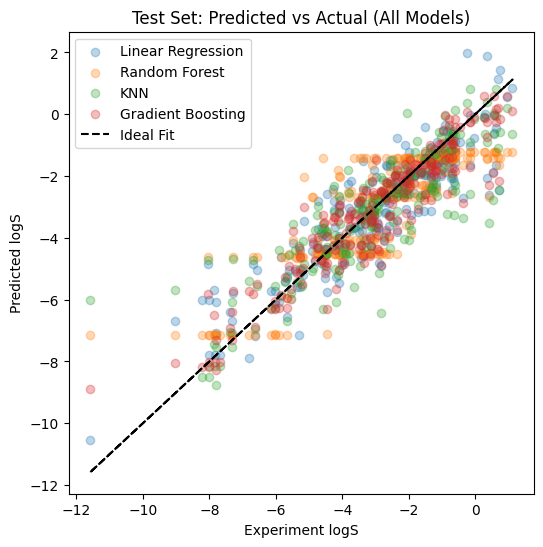

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))

plt.scatter(y_test, y_lr_test_pred, alpha=0.3, label='Linear Regression')
plt.scatter(y_test, y_rf_test_pred, alpha=0.3, label='Random Forest')
plt.scatter(y_test, y_knn_test_pred, alpha=0.3, label='KNN')
plt.scatter(y_test, y_gbr_test_pred, alpha=0.3, label='Gradient Boosting')

plt.plot(y_test, y_test, 'k--', label='Ideal Fit')

plt.xlabel('Experiment logS')
plt.ylabel('Predicted logS')
plt.title('Test Set: Predicted vs Actual (All Models)')
plt.legend()
plt.show()



## **Comparison of all models**

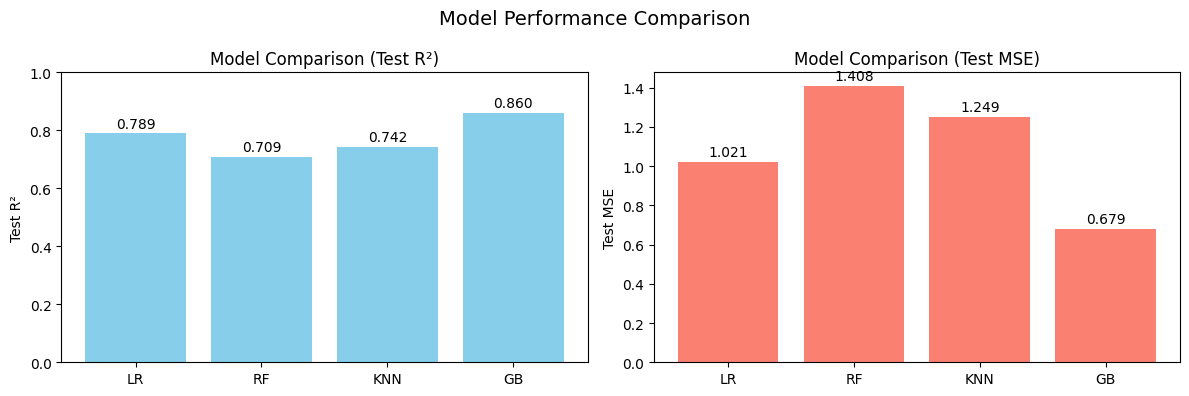

In [ ]:
import matplotlib.pyplot as plt

models = ['LR', 'RF', 'KNN', 'GB']
test_r2 = [0.789162, 0.709223, 0.742055, 0.859752]
test_mse = [1.020695, 1.407688, 1.248745, 0.678957]

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].bar(models, test_r2, color='skyblue')
ax[0].set_title('Model Comparison (Test R²)')
ax[0].set_ylabel('Test R²')
ax[0].set_ylim(0, 1)

for i, v in enumerate(test_r2):
    ax[0].text(i, v + 0.02, f'{v:.3f}', ha='center')

ax[1].bar(models, test_mse, color='salmon')
ax[1].set_title('Model Comparison (Test MSE)')
ax[1].set_ylabel('Test MSE')

for i, v in enumerate(test_mse):
    ax[1].text(i, v + 0.03, f'{v:.3f}', ha='center')

plt.suptitle('Model Performance Comparison', fontsize=14)
plt.tight_layout()
plt.show()
